In [27]:
%matplotlib inline
import pandas as pd
import os, sys, json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='simsun.ttc',size=14)
myfont.set_family('SimHei')

In [16]:
df0 = pd.read_csv('time_series_19-covid-Confirmed.csv')
dates = ['%s月%s日'%(v1[0], v1[1]) for v1 in [v.split('/')[:2] for v in df0.columns[4:]]]
dates = [(df0.columns[4:][i], dates[i]) for i in range(len(dates))]
df0 = df0.rename(columns = dict(dates))
df1 = df0.groupby('Country/Region').sum().reset_index()

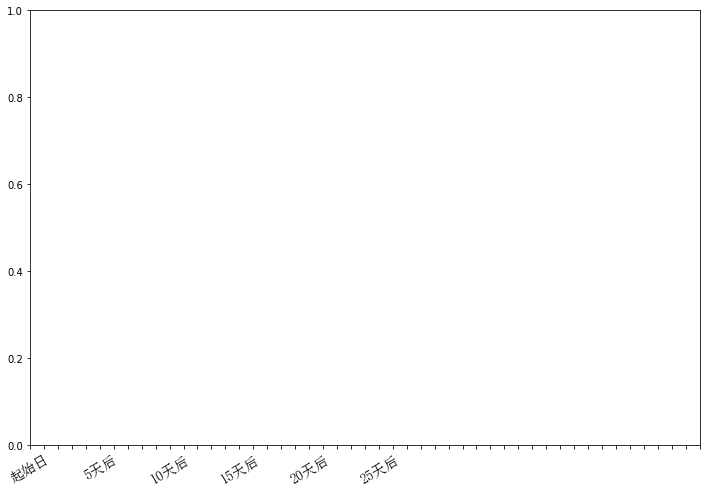

In [17]:
fig, ax = plt.subplots(1,1,figsize=[12,8])
def draw(ax, v):
    ax.plot(range(len(v)), v)
    return ax
_ = plt.xticks(range(len(v)), lb, rotation=30, fontproperties= myfont)

## 统计最严重的30个国家地区

In [4]:
top30_cn_str = '中国大陆 意大利 伊朗 韩国 法国 西班牙 美国 德国 钻石公主号邮轮 日本 瑞士 挪威 英国 荷兰 瑞典 \
比利时 丹麦 奥地利 新加坡 马来西亚 香港特别行政区 巴林王国 澳大利亚 希腊 加拿大 阿联酋 伊拉克 科威特 冰岛 埃及'
top30_cn = top30_cn_str.split(' ')
df2 = df1.sort_values('3月10日', ascending=False)[:30].reset_index()
df2['国家/地区'] = top30_cn

## 中国大陆分为湖北与湖北以外

In [5]:
tp = df0.groupby('Province/State').sum().reset_index()
tp = tp.sort_values('3月10日', ascending=False).reset_index()[:1]
tp['国家/地区'] = '湖北'
hubei = tp.values[0][4:-1]
china = df2[df2['国家/地区'] == '中国大陆'].values[0][4:-1]
china_nonubei = [china[i] - hubei[i] for i in range(len(china))]

In [6]:
china_nonubei[0]

103

0 中国大陆 1月22日 547
中国大陆 1月22日 547 1月28日 5494
32 意大利 2月23日 155
意大利 2月23日 155 3月7日 5883
35 伊朗 2月26日 139
伊朗 2月26日 139 3月7日 5823
29 韩国 2月20日 104
韩国 2月20日 104 3月3日 5186
39 法国 3月1日 130
法国 3月1日 130 3月10日 1784
40 西班牙 3月2日 120
西班牙 3月2日 120 3月10日 1695
41 美国 3月3日 118
美国 3月3日 118 3月10日 1670
39 德国 3月1日 130
德国 3月1日 130 3月10日 1457
19 钻石公主号邮轮 2月10日 135
钻石公主号邮轮 2月10日 135 3月10日 696
30 日本 2月21日 105
日本 2月21日 105 3月10日 581
43 瑞士 3月5日 114
瑞士 3月5日 114 3月10日 491
44 挪威 3月6日 108
挪威 3月6日 108 3月10日 400
43 英国 3月5日 115
英国 3月5日 115 3月10日 382
44 荷兰 3月6日 128
荷兰 3月6日 128 3月10日 382
44 瑞典 3月6日 101
瑞典 3月6日 101 3月10日 355
44 比利时 3月6日 109
比利时 3月6日 109 3月10日 267
48 丹麦 3月10日 262
丹麦 3月10日 262 3月10日 262
46 奥地利 3月8日 104
奥地利 3月8日 104 3月10日 182
38 新加坡 2月29日 102
新加坡 2月29日 102 3月10日 160
47 马来西亚 3月9日 117
马来西亚 3月9日 117 3月10日 129
42 香港特别行政区 3月4日 105
香港特别行政区 3月4日 105 3月10日 120
48 巴林王国 3月10日 110
巴林王国 3月10日 110 3月10日 110
48 澳大利亚 3月10日 107
澳大利亚 3月10日 107 3月10日 107
希腊 3月10日 89 3月10日 89
加拿大 3月10日 79 3月10日 79
阿联酋 3月10日 74 3月10日 74
伊拉克 3月10日 71 3

Text(0.5, 1.0, '各国家/地区确诊病例突破100人后的时序增长图')

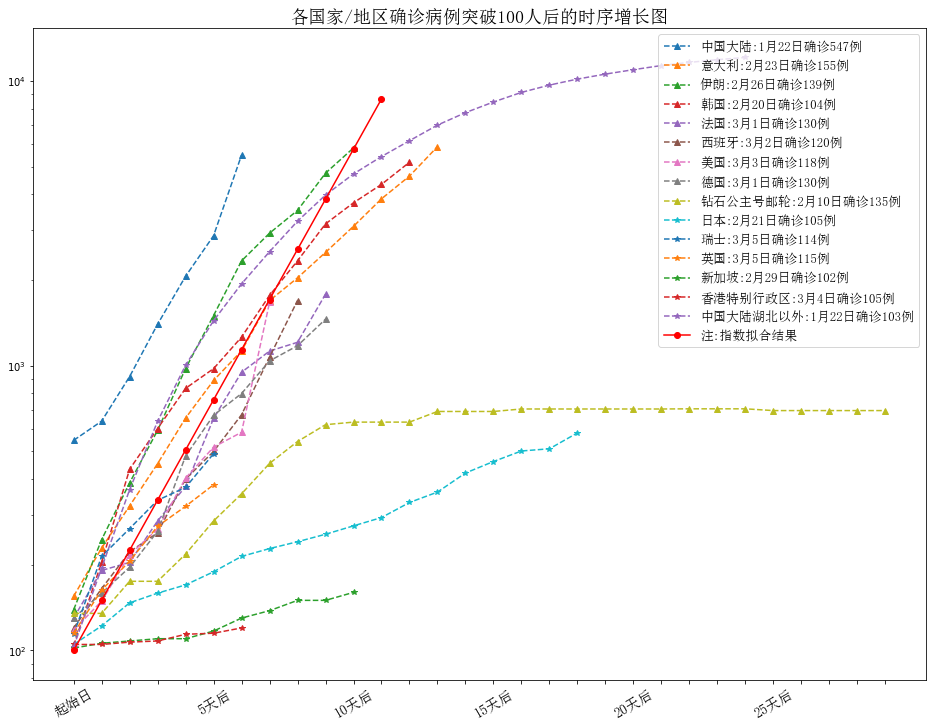

In [22]:
df = df2
def draw(ax, v, c, style):
    #ax.plot(range(len(v)), v, label=c )
    ax.semilogy(range(len(v)), v, style, label=c)
    return ax

plt.rcParams['font.sans-serif']=['SimHei']
fig, ax = plt.subplots(1,1,figsize=[16,12])

#counrty_ls = [c for c in top30_cn if c not in ['中国大陆', '钻石公主邮轮号']]
counrty_ls = top30_cn

count = 0
for c in counrty_ls:
    tp = df[df['国家/地区'] == c]
    v = tp.values[0][4:-1]
    lb = df.columns[4:-1]
    ileft, iright = 0, len(v) - 1
    for i, v1 in enumerate(v):
        ileft = i
        if v1 > 100:
            print(i, c,  lb[i], v1)
            break
    
    for i, v1 in enumerate(v):
        iright = i
        if v1 > 5000:
            break
    
    print(c,  lb[ileft], v[ileft], lb[iright], v[iright])
    v_good = v[ileft:iright+1]
    v_dif = [0] + [v_good[i+1] - v_good[i] for i in range(len(v_good) -1)]
    lc = "%s:%s确诊%s例"%(c, lb[ileft], v_good[0])
    if len(v_good) > 5:
        if count <9:
            ax = draw(ax, v_good, lc, style='^--')
        else:
            ax = draw(ax, v_good, lc, style='*--')
    count +=1

v_sim = [1.5**i*100 for i in range(12) ]
#ax = draw(ax, v_sim, '拟合')
ax = draw(ax, china_nonubei[:25], '中国大陆湖北以外:1月22日确诊103例', style='*--')
ax.semilogy(range(len(v_sim)), v_sim, 'ro-', label='注:指数拟合结果' )
# lb = df.columns[20:]
# ax = draw(ax, hubei, '湖北', style='*-')


lb = ['%d天后'%(i) if i%5==0 else '' for i in range(30)]
lb[0] = '起始日'
_ = plt.xticks(range(len(lb)), lb, rotation=30,fontproperties= myfont, fontsize= 14)
plt.legend(prop = myfont, fontsize=30)
plt.title("各国家/地区确诊病例突破100人后的时序增长图", fontproperties= myfont, fontsize=18)

## 含拟合

32 意大利 2月23日 155
意大利 2月23日 155 3月7日 5883
35 伊朗 2月26日 139
伊朗 2月26日 139 3月7日 5823
29 韩国 2月20日 104
韩国 2月20日 104 3月3日 5186
39 法国 3月1日 130
法国 3月1日 130 3月10日 1784
40 西班牙 3月2日 120
西班牙 3月2日 120 3月10日 1695
41 美国 3月3日 118
美国 3月3日 118 3月10日 1670
39 德国 3月1日 130
德国 3月1日 130 3月10日 1457
30 日本 2月21日 105
日本 2月21日 105 3月10日 581
43 瑞士 3月5日 114
瑞士 3月5日 114 3月10日 491
44 挪威 3月6日 108
挪威 3月6日 108 3月10日 400
43 英国 3月5日 115
英国 3月5日 115 3月10日 382
44 荷兰 3月6日 128
荷兰 3月6日 128 3月10日 382
44 瑞典 3月6日 101
瑞典 3月6日 101 3月10日 355
44 比利时 3月6日 109
比利时 3月6日 109 3月10日 267
48 丹麦 3月10日 262
丹麦 3月10日 262 3月10日 262
46 奥地利 3月8日 104
奥地利 3月8日 104 3月10日 182
38 新加坡 2月29日 102
新加坡 2月29日 102 3月10日 160
47 马来西亚 3月9日 117
马来西亚 3月9日 117 3月10日 129
42 香港特别行政区 3月4日 105
香港特别行政区 3月4日 105 3月10日 120
48 巴林王国 3月10日 110
巴林王国 3月10日 110 3月10日 110
48 澳大利亚 3月10日 107
澳大利亚 3月10日 107 3月10日 107
希腊 3月10日 89 3月10日 89
加拿大 3月10日 79 3月10日 79
阿联酋 3月10日 74 3月10日 74
伊拉克 3月10日 71 3月10日 71
科威特 3月10日 69 3月10日 69
冰岛 3月10日 69 3月10日 69
埃及 3月10日 59 3月10日 59


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/ipykernel_launcher.py:63: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


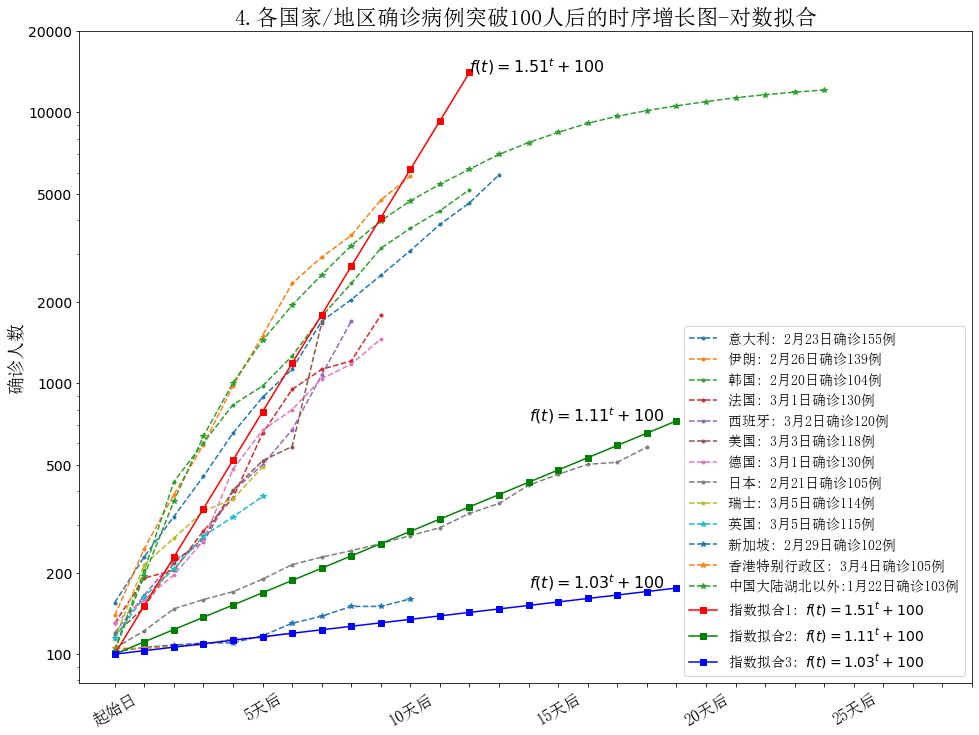

In [28]:
df = df2
def draw(ax, v, c, style):
    #ax.plot(range(len(v)), v, label=c )
    ax.semilogy(range(len(v)), v, style, label=c)
    return ax

plt.rcParams['font.sans-serif']=['SimHei']
fig, ax = plt.subplots(1,1,figsize=[16,12])

counrty_ls = [c for c in top30_cn if c not in ['中国大陆', '钻石公主号邮轮']]
#counrty_ls = top30_cn

count = 0
for c in counrty_ls:
    tp = df[df['国家/地区'] == c]
    v = tp.values[0][4:-1]
    lb = df.columns[4:-1]
    ileft, iright = 0, len(v) - 1
    for i, v1 in enumerate(v):
        ileft = i
        if v1 > 100:
            print(i, c,  lb[i], v1)
            break
    
    for i, v1 in enumerate(v):
        iright = i
        if v1 > 5000:
            break
    
    print(c,  lb[ileft], v[ileft], lb[iright], v[iright])
    v_good = v[ileft:iright+1]
    v_dif = [0] + [v_good[i+1] - v_good[i] for i in range(len(v_good) -1)]
    lc = "%s: %s确诊%s例"%(c, lb[ileft], v_good[0])
    if len(v_good) > 5:
        if count <9:
            ax = draw(ax, v_good, lc, style='.--')
        else:
            ax = draw(ax, v_good, lc, style='*--')
    count +=1


#ax = draw(ax, v_sim, '拟合')
ax = draw(ax, china_nonubei[:25], '中国大陆湖北以外:1月22日确诊103例', style='*--')

beta = 1.51
v_sim = [beta**i*100 for i in range(13) ]
func = '$f(t)=%s^t + 100$'%(str(beta))
ax.semilogy(range(len(v_sim)), v_sim, 'rs-', label='指数拟合1: %s'%(func))
plt.text(len(v_sim) -1 ,v_sim[-1],func,fontsize=16)

beta = 1.11
v_sim = [beta**i*100 for i in range(20) ]
func = '$f(t)=%s^t + 100$'%(str(beta))
ax.semilogy(range(len(v_sim)), v_sim, 'gs-', label='指数拟合2: %s'%(func))
plt.text(len(v_sim) - 6,v_sim[-1],func,fontsize=16)
beta = 1.03
v_sim = [beta**i*100 for i in range(20) ]
func = '$f(t)=%s^t + 100$'%(str(beta))
ax.semilogy(range(len(v_sim)), v_sim, 'bs-', label='指数拟合3: %s'%(func))
plt.text(len(v_sim) - 6,v_sim[-1],func,fontsize=16)

plt.yticks([100, 200, 500, 1000,2000, 5000, 10000, 20000],[100, 200, 500, 1000,2000, 5000, 10000, 20000], fontsize=14)
plt.ylim([0,20000])
plt.ylabel('确诊人数', fontproperties= myfont, fontsize=18)
# lb = df.columns[20:]
# ax = draw(ax, hubei, '湖北', style='*-')
#plt.text(-2,2,r'sf',fontsize=16)

lb = ['%d天后'%(i) if i%5==0 else '' for i in range(30)]
lb[0] = '起始日'
_ = plt.xticks(range(len(lb)), lb, rotation=30,fontproperties= myfont, fontsize= 16)
plt.legend(prop = myfont, fontsize=30, loc=0)
plt.title("4.各国家/地区确诊病例突破100人后的时序增长图-对数拟合", fontproperties= myfont, fontsize=22)
plt.savefig('4各国家地区确诊病例突破100人后的时序增长图-对数拟合.png')

## 不含拟合

32 意大利 2月23日 155
意大利 2月23日 155 3月7日 5883
35 伊朗 2月26日 139
伊朗 2月26日 139 3月7日 5823
29 韩国 2月20日 104
韩国 2月20日 104 3月3日 5186
39 法国 3月1日 130
法国 3月1日 130 3月10日 1784
40 西班牙 3月2日 120
西班牙 3月2日 120 3月10日 1695
41 美国 3月3日 118
美国 3月3日 118 3月10日 1670
39 德国 3月1日 130
德国 3月1日 130 3月10日 1457
30 日本 2月21日 105
日本 2月21日 105 3月10日 581
43 瑞士 3月5日 114
瑞士 3月5日 114 3月10日 491
44 挪威 3月6日 108
挪威 3月6日 108 3月10日 400
43 英国 3月5日 115
英国 3月5日 115 3月10日 382
44 荷兰 3月6日 128
荷兰 3月6日 128 3月10日 382
44 瑞典 3月6日 101
瑞典 3月6日 101 3月10日 355
44 比利时 3月6日 109
比利时 3月6日 109 3月10日 267
48 丹麦 3月10日 262
丹麦 3月10日 262 3月10日 262
46 奥地利 3月8日 104
奥地利 3月8日 104 3月10日 182
38 新加坡 2月29日 102
新加坡 2月29日 102 3月10日 160
47 马来西亚 3月9日 117
马来西亚 3月9日 117 3月10日 129
42 香港特别行政区 3月4日 105
香港特别行政区 3月4日 105 3月10日 120
48 巴林王国 3月10日 110
巴林王国 3月10日 110 3月10日 110
48 澳大利亚 3月10日 107
澳大利亚 3月10日 107 3月10日 107
希腊 3月10日 89 3月10日 89
加拿大 3月10日 79 3月10日 79
阿联酋 3月10日 74 3月10日 74
伊拉克 3月10日 71 3月10日 71
科威特 3月10日 69 3月10日 69
冰岛 3月10日 69 3月10日 69
埃及 3月10日 59 3月10日 59


/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


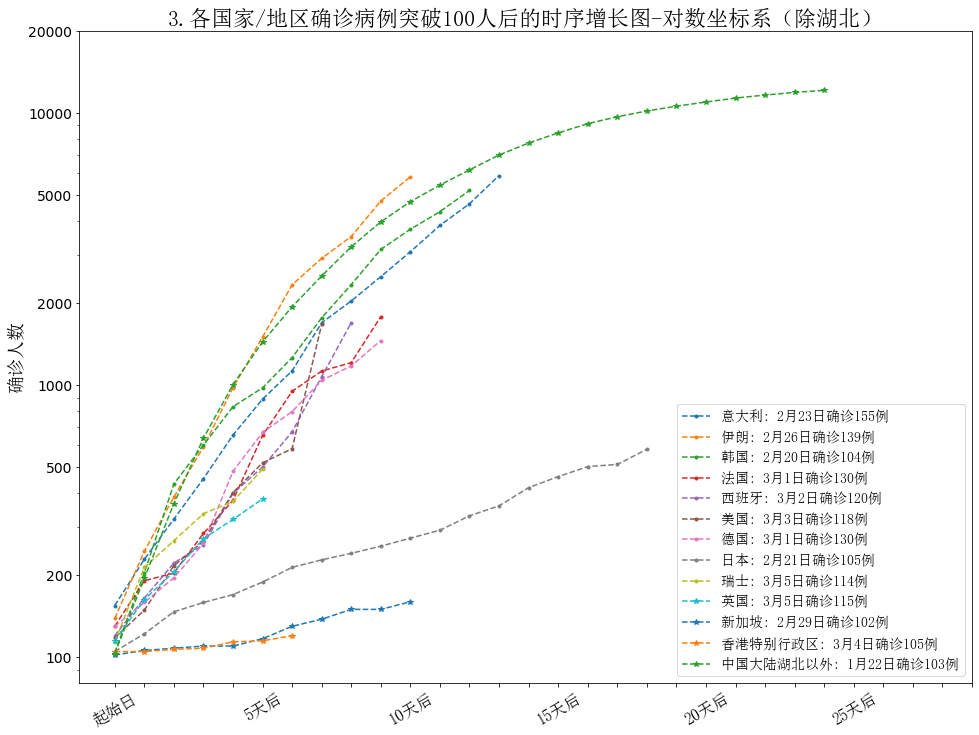

In [30]:
df = df2
def draw(ax, v, c, style):
    #ax.plot(range(len(v)), v, label=c )
    ax.semilogy(range(len(v)), v, style, label=c)
    return ax

plt.rcParams['font.sans-serif']=['SimHei']
fig, ax = plt.subplots(1,1,figsize=[16,12])

counrty_ls = [c for c in top30_cn if c not in ['中国大陆', '钻石公主号邮轮']]
#counrty_ls = top30_cn

count = 0
for c in counrty_ls:
    tp = df[df['国家/地区'] == c]
    v = tp.values[0][4:-1]
    lb = df.columns[4:-1]
    ileft, iright = 0, len(v) - 1
    for i, v1 in enumerate(v):
        ileft = i
        if v1 > 100:
            print(i, c,  lb[i], v1)
            break
    
    for i, v1 in enumerate(v):
        iright = i
        if v1 > 5000:
            break
    
    print(c,  lb[ileft], v[ileft], lb[iright], v[iright])
    v_good = v[ileft:iright+1]
    v_dif = [0] + [v_good[i+1] - v_good[i] for i in range(len(v_good) -1)]
    lc = "%s: %s确诊%s例"%(c, lb[ileft], v_good[0])
    if len(v_good) > 5:
        if count <9:
            ax = draw(ax, v_good, lc, style='.--')
        else:
            ax = draw(ax, v_good, lc, style='*--')
    count +=1


#ax = draw(ax, v_sim, '拟合')
ax = draw(ax, china_nonubei[:25], '中国大陆湖北以外: 1月22日确诊103例', style='*--')

plt.yticks([100, 200, 500, 1000,2000, 5000, 10000, 20000],[100, 200, 500, 1000,2000, 5000, 10000, 20000], fontsize=14)
plt.ylim([0,20000])
plt.ylabel('确诊人数', fontproperties= myfont, fontsize=18)
# lb = df.columns[20:]
# ax = draw(ax, hubei, '湖北', style='*-')
#plt.text(-2,2,r'sf',fontsize=16)

lb = ['%d天后'%(i) if i%5==0 else '' for i in range(30)]
lb[0] = '起始日'
_ = plt.xticks(range(len(lb)), lb, rotation=30,fontproperties= myfont, fontsize= 16)
plt.legend(prop = myfont, fontsize=30, loc=0)
plt.title("3.各国家/地区确诊病例突破100人后的时序增长图-对数坐标系（除湖北）", fontproperties= myfont, fontsize=22)
plt.savefig('3各国家地区确诊病例突破100人后的时序增长图-对数（除湖北）.png')

## 正常坐标系

0 中国大陆 1月22日 547
中国大陆 1月22日 547 2月1日 11871
32 意大利 2月23日 155
意大利 2月23日 155 3月10日 10149
35 伊朗 2月26日 139
伊朗 2月26日 139 3月10日 8042
29 韩国 2月20日 104
韩国 2月20日 104 3月10日 7513
39 法国 3月1日 130
法国 3月1日 130 3月10日 1784
40 西班牙 3月2日 120
西班牙 3月2日 120 3月10日 1695
41 美国 3月3日 118
美国 3月3日 118 3月10日 1670
39 德国 3月1日 130
德国 3月1日 130 3月10日 1457
19 钻石公主号邮轮 2月10日 135
钻石公主号邮轮 2月10日 135 3月10日 696
30 日本 2月21日 105
日本 2月21日 105 3月10日 581
43 瑞士 3月5日 114
瑞士 3月5日 114 3月10日 491
44 挪威 3月6日 108
挪威 3月6日 108 3月10日 400
43 英国 3月5日 115
英国 3月5日 115 3月10日 382
44 荷兰 3月6日 128
荷兰 3月6日 128 3月10日 382
44 瑞典 3月6日 101
瑞典 3月6日 101 3月10日 355
44 比利时 3月6日 109
比利时 3月6日 109 3月10日 267
48 丹麦 3月10日 262
丹麦 3月10日 262 3月10日 262
46 奥地利 3月8日 104
奥地利 3月8日 104 3月10日 182
38 新加坡 2月29日 102
新加坡 2月29日 102 3月10日 160
47 马来西亚 3月9日 117
马来西亚 3月9日 117 3月10日 129
42 香港特别行政区 3月4日 105
香港特别行政区 3月4日 105 3月10日 120
48 巴林王国 3月10日 110
巴林王国 3月10日 110 3月10日 110
48 澳大利亚 3月10日 107
澳大利亚 3月10日 107 3月10日 107
希腊 3月10日 89 3月10日 89
加拿大 3月10日 79 3月10日 79
阿联酋 3月10日 74 3月10日 74
伊拉克 3月10日 

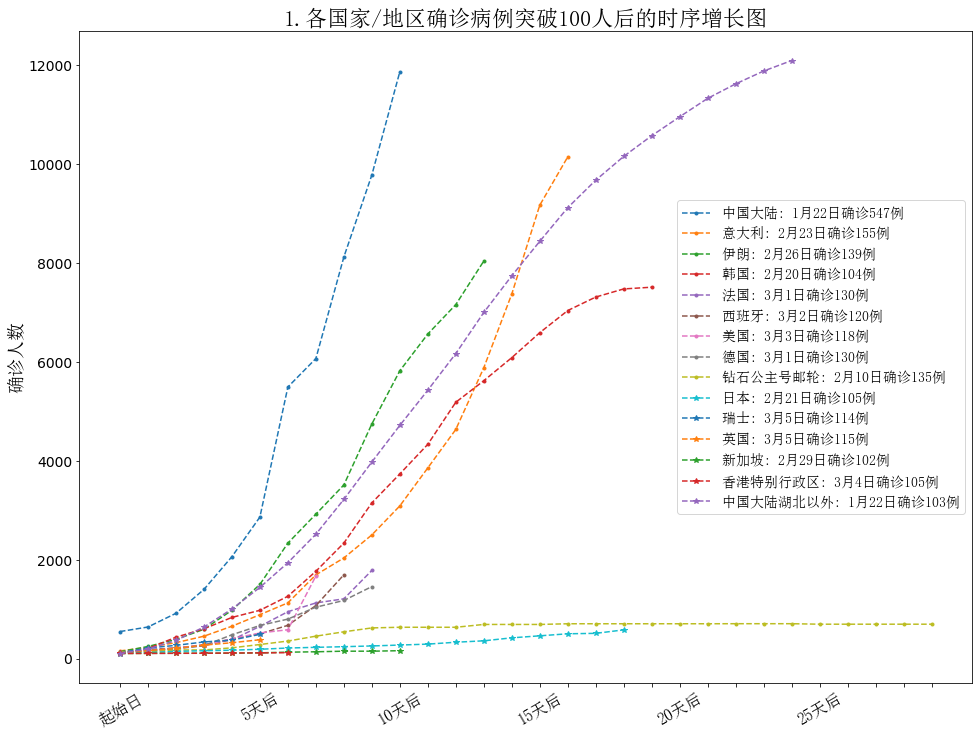

In [29]:
df = df2
def draw(ax, v, c, style):
    ax.plot(range(len(v)), v, style, label=c )
    #ax.semilogy(range(len(v)), v, style, label=c)
    return ax

plt.rcParams['font.sans-serif']=['SimHei']
fig, ax = plt.subplots(1,1,figsize=[16,12])

#counrty_ls = [c for c in top30_cn if c not in ['中国大陆', '钻石公主号邮轮']]
counrty_ls = top30_cn

count = 0
for c in counrty_ls:
    tp = df[df['国家/地区'] == c]
    v = tp.values[0][4:-1]
    lb = df.columns[4:-1]
    ileft, iright = 0, len(v) - 1
    for i, v1 in enumerate(v):
        ileft = i
        if v1 > 100:
            print(i, c,  lb[i], v1)
            break
    
    for i, v1 in enumerate(v):
        iright = i
        if v1 > 10000:
            break
    
    print(c,  lb[ileft], v[ileft], lb[iright], v[iright])
    v_good = v[ileft:iright+1]
    v_dif = [0] + [v_good[i+1] - v_good[i] for i in range(len(v_good) -1)]
    lc = "%s: %s确诊%s例"%(c, lb[ileft], v_good[0])
    if len(v_good) > 5:
        if count <9:
            ax = draw(ax, v_good, lc, style='.--')
        else:
            ax = draw(ax, v_good, lc, style='*--')
    count +=1


#ax = draw(ax, v_sim, '拟合')
ax = draw(ax, china_nonubei[:25], '中国大陆湖北以外: 1月22日确诊103例', style='*--')

#plt.yticks([100, 200, 500, 1000,2000, 5000, 10000, 20000],[100, 200, 500, 1000,2000, 5000, 10000, 20000], fontsize=14)
#plt.ylim([0,20000])
plt.yticks(fontsize=14)
plt.ylabel('确诊人数', fontproperties= myfont, fontsize=18)
# lb = df.columns[20:]
# ax = draw(ax, hubei, '湖北', style='*-')
#plt.text(-2,2,r'sf',fontsize=16)

lb = ['%d天后'%(i) if i%5==0 else '' for i in range(30)]
lb[0] = '起始日'
_ = plt.xticks(range(len(lb)), lb, rotation=30,fontproperties= myfont, fontsize= 16)
plt.legend(prop = myfont, fontsize=30, loc=0)
plt.title("1.各国家/地区确诊病例突破100人后的时序增长图", fontproperties= myfont, fontsize=22)
plt.savefig('1各国家地区确诊病例突破100人后的时序增长图.png')

## 对数坐标系

0 中国大陆 1月22日 547
中国大陆 1月22日 547 2月1日 11871
32 意大利 2月23日 155
意大利 2月23日 155 3月10日 10149
35 伊朗 2月26日 139
伊朗 2月26日 139 3月10日 8042
29 韩国 2月20日 104
韩国 2月20日 104 3月10日 7513
39 法国 3月1日 130
法国 3月1日 130 3月10日 1784
40 西班牙 3月2日 120
西班牙 3月2日 120 3月10日 1695
41 美国 3月3日 118
美国 3月3日 118 3月10日 1670
39 德国 3月1日 130
德国 3月1日 130 3月10日 1457
19 钻石公主号邮轮 2月10日 135
钻石公主号邮轮 2月10日 135 3月10日 696
30 日本 2月21日 105
日本 2月21日 105 3月10日 581
43 瑞士 3月5日 114
瑞士 3月5日 114 3月10日 491
44 挪威 3月6日 108
挪威 3月6日 108 3月10日 400
43 英国 3月5日 115
英国 3月5日 115 3月10日 382
44 荷兰 3月6日 128
荷兰 3月6日 128 3月10日 382
44 瑞典 3月6日 101
瑞典 3月6日 101 3月10日 355
44 比利时 3月6日 109
比利时 3月6日 109 3月10日 267
48 丹麦 3月10日 262
丹麦 3月10日 262 3月10日 262
46 奥地利 3月8日 104
奥地利 3月8日 104 3月10日 182
38 新加坡 2月29日 102
新加坡 2月29日 102 3月10日 160
47 马来西亚 3月9日 117
马来西亚 3月9日 117 3月10日 129
42 香港特别行政区 3月4日 105
香港特别行政区 3月4日 105 3月10日 120
48 巴林王国 3月10日 110
巴林王国 3月10日 110 3月10日 110
48 澳大利亚 3月10日 107
澳大利亚 3月10日 107 3月10日 107
希腊 3月10日 89 3月10日 89
加拿大 3月10日 79 3月10日 79
阿联酋 3月10日 74 3月10日 74
伊拉克 3月10日 

/Users/kangqitang/Desktop/env/vp3/lib/python3.6/site-packages/ipykernel_launcher.py:46: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


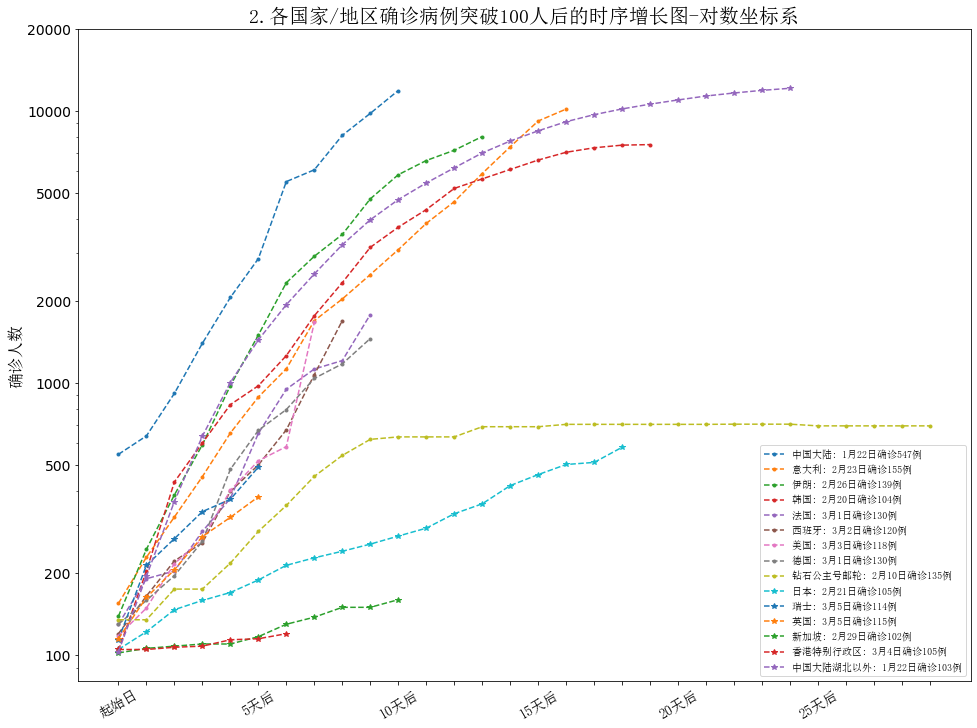

In [179]:
df = df2
def draw(ax, v, c, style):
    #ax.plot(range(len(v)), v, style, label=c )
    ax.semilogy(range(len(v)), v, style, label=c)
    return ax

plt.rcParams['font.sans-serif']=['SimHei']
fig, ax = plt.subplots(1,1,figsize=[16,12])

#counrty_ls = [c for c in top30_cn if c not in ['中国大陆', '钻石公主号邮轮']]
counrty_ls = top30_cn

count = 0
for c in counrty_ls:
    tp = df[df['国家/地区'] == c]
    v = tp.values[0][4:-1]
    lb = df.columns[4:-1]
    ileft, iright = 0, len(v) - 1
    for i, v1 in enumerate(v):
        ileft = i
        if v1 > 100:
            print(i, c,  lb[i], v1)
            break
    
    for i, v1 in enumerate(v):
        iright = i
        if v1 > 10000:
            break
    
    print(c,  lb[ileft], v[ileft], lb[iright], v[iright])
    v_good = v[ileft:iright+1]
    v_dif = [0] + [v_good[i+1] - v_good[i] for i in range(len(v_good) -1)]
    lc = "%s: %s确诊%s例"%(c, lb[ileft], v_good[0])
    if len(v_good) > 5:
        if count <9:
            ax = draw(ax, v_good, lc, style='.--')
        else:
            ax = draw(ax, v_good, lc, style='*--')
    count +=1


#ax = draw(ax, v_sim, '拟合')
ax = draw(ax, china_nonubei[:25], '中国大陆湖北以外: 1月22日确诊103例', style='*--')

plt.yticks([100, 200, 500, 1000,2000, 5000, 10000, 20000],[100, 200, 500, 1000,2000, 5000, 10000, 20000], fontsize=14)
plt.ylim([0,20000])
plt.ylabel('确诊人数', fontproperties= myfont, fontsize=16)
# lb = df.columns[20:]
# ax = draw(ax, hubei, '湖北', style='*-')
#plt.text(-2,2,r'sf',fontsize=16)

lb = ['%d天后'%(i) if i%5==0 else '' for i in range(30)]
lb[0] = '起始日'
_ = plt.xticks(range(len(lb)), lb, rotation=30,fontproperties= myfont, fontsize= 14)
plt.legend(prop = myfont, fontsize=30, loc=0)
plt.title("2.各国家/地区确诊病例突破100人后的时序增长图-对数坐标系", fontproperties= myfont, fontsize=20)
plt.savefig('2各国家地区确诊病例突破100人后的时序增长图-对数.png')